<a href="https://colab.research.google.com/github/Reitnos/Employee-Retention-Analysis/blob/main/Employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import csv files from github repository

In [ ]:
import pandas as pd
retention_url = 'https://github.com/Reitnos/Employee-Retention-Analysis/blob/main/Retention.csv?raw=true'
rt_df = pd.read_csv(retention_url,index_col= None)
cost_url = 'https://github.com/Reitnos/Employee-Retention-Analysis/blob/main/TrainingCost.csv?raw=true'
cst_df = pd.read_csv(cost_url,index_col= None)

In [ ]:
(rt_df.shape,
cst_df.shape)


In [ ]:
rt_df.head(5)

,Satisfaction,Last_evaluation,Project,Monthly_hours,Time,Left,Promotion,Department,Salary
0,0.38,0.53,2,157,3,1,0,sales,low
1,0.80,0.86,5,262,6,1,0,sales,medium
2,0.11,0.88,7,272,4,1,0,sales,medium
3,0.72,0.87,5,223,5,1,0,sales,low
4,0.37,0.52,2,159,3,1,0,sales,low


In [ ]:
rt_df.columns.values

array(['Satisfaction', 'Last_evaluation', 'Project', 'Monthly_hours',
       'Time', 'Left', 'Promotion', 'Department', 'Salary'], dtype=object)

In [ ]:
cst_df.columns.values

array(['Department', 'Salary', 'CostOfTraining'], dtype=object)

1- How many employees are there in the dataset?

In [ ]:
rt_df.shape[0]

14999

2- Are there any missing values in the dataset?

In [ ]:
rt_df.info()

3- Find min, average and max satisfaction score in the data set:

In [ ]:
rt_df.Satisfaction.agg(["min","mean","max"])

min     0.090000
mean    0.612834
max     1.000000
Name: Satisfaction, dtype: float64

4- How many departments are in the data set?

In [ ]:
rt_df.Department.unique().size

10

5- How many employees are in each department?

In [ ]:
rt_df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

6- Find min, average and max satisfaction score in each department:

In [ ]:
rt_df.groupby("Department")["Satisfaction"].agg(["min","mean","max"])

,min,mean,max
Department,,,
IT,0.09,0.618142,1.0
RandD,0.09,0.619822,1.0
accounting,0.09,0.582151,1.0
hr,0.09,0.598809,1.0
management,0.09,0.621349,1.0
marketing,0.09,0.618601,1.0
product_mng,0.09,0.619634,1.0
sales,0.09,0.614447,1.0
support,0.09,0.618300,1.0


7- Calculate retention rates, i.e., the % of employees that have NOT left, for all departments.

In [ ]:
ret_rate = (rt_df[rt_df["Left"] == 0].groupby("Department").agg(EmployeeStayPercentage = ("Left","count")) / rt_df.groupby("Department").agg(EmployeeStayPercentage = ("Left","count"))*100).reset_index()
ret_rate


,Department,EmployeeStayPercentage
0,IT,77.750611
1,RandD,84.625159
2,accounting,73.402868
3,hr,70.906631
4,management,85.555556
5,marketing,76.340326
6,product_mng,78.048780
7,sales,75.507246
8,support,75.100942
9,technical,74.375000


8- Create a bar graph to visualize retention rates in each department:

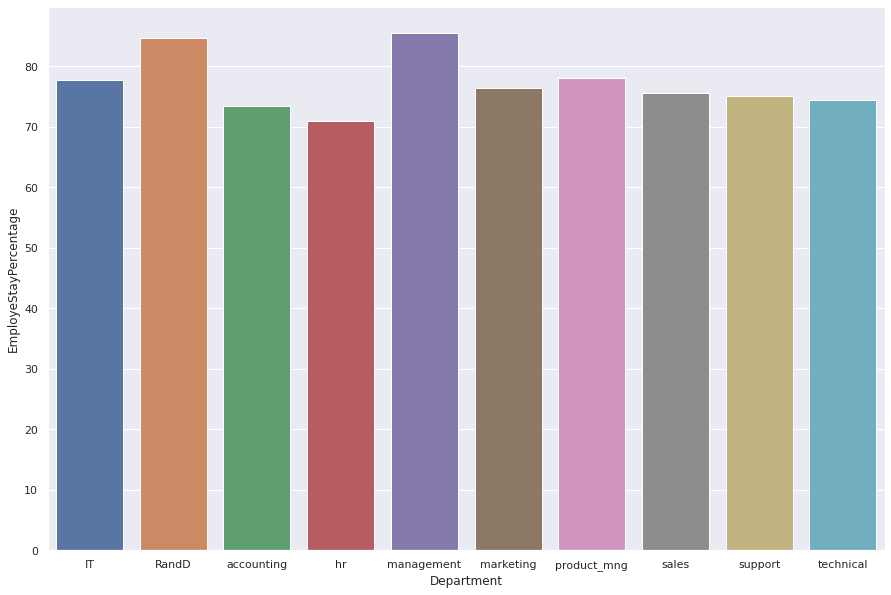

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x = 'Department', y = 'EmployeeStayPercentage', data = ret_rate)

9- Which department has the lowest retention rate? How much is it?

In [ ]:
index = ret_rate['EmployeeStayPercentage'].idxmin()
ret_rate.iloc[index]["Department"]

'hr'

10- In the retention table create a new column trainingCost and fill this column with training cost for each employee from the trainingCost table. Display the head of the retention table:

In [ ]:
departments = rt_df['Department'].unique()
salaries = rt_df["Salary"].unique()
for dep in departments:
  for sal in salaries:

    rt_df.loc[(rt_df["Department"] == dep) & (rt_df["Salary"] == sal),"trainingCost"]= cst_df[(cst_df["Department"] == dep) & (cst_df["Salary"] == sal)]["CostOfTraining"].iloc[0]
 
rt_df

,Satisfaction,Last_evaluation,Project,Monthly_hours,Time,Left,Promotion,Department,Salary,trainingCost
0,0.38,0.53,2,157,3,1,0,sales,low,500
1,0.80,0.86,5,262,6,1,0,sales,medium,1000
2,0.11,0.88,7,272,4,1,0,sales,medium,1000
3,0.72,0.87,5,223,5,1,0,sales,low,500
4,0.37,0.52,2,159,3,1,0,sales,low,500
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,0,support,low,300
14995,0.37,0.48,2,160,3,1,0,support,low,300
14996,0.37,0.53,2,143,3,1,0,support,low,300
14997,0.11,0.96,6,280,4,1,0,support,low,300


11- What is the total training cost spent for all the employees? Out of this total, what is the percentage spent on those who have left the company?


In [ ]:
totalCostSpent = rt_df["trainingCost"].sum()
totalSpentOnLeft = (rt_df.query("Left == 1"))["trainingCost"].sum()
PercentOfSpentOnLeft = totalSpentOnLeft / totalCostSpent * 100
PercentOfSpentOnLeft

21.505923224988656

12- Which department spends the largest fraction of its training costs on employees that ultimately leave the company?

In [ ]:
departmentGrouped = rt_df.groupby("Department")
trainingCostPerDep = departmentGrouped.agg(totalCost = ("trainingCost","sum")).reset_index()
spentGrouped = rt_df.groupby(["Department","Left"])["trainingCost"].sum().reset_index()
spentOnLeft = spentGrouped[spentGrouped['Left'] == 1].reset_index()
spentOnLeftPercentage = spentOnLeft["trainingCost"] / trainingCostPerDep["totalCost"] * 100
result = pd.DataFrame({"Department":departmentGrouped.groups.keys(), "spentOnLeftPercentage": spentOnLeftPercentage})
result[result["spentOnLeftPercentage"] == result["spentOnLeftPercentage"].max() ]




,Department,spentOnLeftPercentage
3,hr,28.956229


13- There is a belief that the best employees , i.e., the employees with the highest evaluation scores, are the ones that are leaving the company. Do you agree? Carry out an AB test and quantify your answer with an appropriate p-value.

In [407]:
highLeftCount = rt_df[(rt_df["Left"] == 1) & (rt_df["Last_evaluation"] >= 0.9)].count()
lowLeftCount = rt_df[(rt_df["Left"] == 1) & (rt_df["Last_evaluation"] < 0.9)].count()
highStayedCount = rt_df[(rt_df["Left"] == 0) & (rt_df["Last_evaluation"] >= 0.9)].count()
lowStayedCount = rt_df[(rt_df["Left"] == 0) & (rt_df["Last_evaluation"] < 0.9)].count()
contingency_table = np.array([[highLeftCount,lowLeftCount],[highStayedCount,lowStayedCount]])


In [408]:
from scipy.stats import chi2_contingency
chi,p_value,_,_ = chi2_contingency(contingency_table,correction = False)


In [409]:
chi,p_value

(1378.5206165150475, 5.90215737499938e-273)

p_value is much lower than the significance level of 0.05, hence Hypothesis can be rejected, meaning there is no sufficient evidence to say employees with the highest evaluation scores are the ones that are leaving the company.